# 평가

- 이진 분류 : 긍정/부정과 같은 2개의 결괏값만을 가짐
- 멀티 분류 : 여러 개의 결정 클래스 값을 가짐

## Accuracy (정확도)
- 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 방법이 아니다.

- 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 정확도 = (TN + TP) / (TN + FP + FN + TP)
- 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님

##  오차 행렬

- 혼동행렬(confusion matrix) 이라고도 함
<img src = './dataset/오차 행렬.png'>

## 정밀도와 재현율

- 정밀도(precision) : TP / (FP + TP)
- 재현율(Recall) : TP / (FN + TP)
>FP + TP : positive 예측
\
>FN + TP : 실제 발생

- 상황에 따라 정밀도나 재현율 등의 특정 비중을 더 높게 봐야하는 상황이 있는데, 이것을 임계치로 조절함

## F1 스코어

- 정밀도와 재현율을 결합한 지표
- F1 = 2 / ((1/recall)+(1/precision))

= 2 * ((precision * recall)/(precision + recall))

## ROC 곡선과 AUC (Area Under Curve)

- ROC : FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선
- FPR x축, TPR y축

- TPR : 재현율. TPR = TP / (FN + TP) 민감도로도 불림
- TNR : 민감도에 대응하는 지표.특이성

민감도(TPR) : 실제값(P)가 정확히 예측되어야 하는 수준(양성>양성판정)

특이성(TNR) : 실제값(N)가 정확이 예측되어야 하는 수준(음성>음성판정)

- TNR = TN / (FP + TN) (재현율)
- FPR = FP / (FP + TN) = 1-TNR(특이성)

- roc_curve

from sklearn.metrics import roc_curve

파라미터 : y_true, y_score, (shape)

반환 값 : fpr, tpr, thresholds

In [72]:
# p.145 평가

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tdf = pd.read_csv('./dataset/titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [74]:
def get_clf_eval(y_test , pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))

In [75]:
# p.156
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis=1)
X_tdf = transform_features(X_tdf)

X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1: 0.7966, roc_auc: 0.8987


실제/예측
TN : True Negative : 네거티브 예측, 
TN FP
FN TP
정밀도 : 양성을 정확하게 예측. TP / FP+TP
재현율 : 실제인것. TP / FN+TP
F1 : ~

- 과제09/14 (1)

상기 오차 행렬로 수작업으로 정확도, 정밀도, 재현율, F1 score를 구하세요.

In [76]:
# TN : 108, FP : 10, FN : 14, TP : 47

# 정확도 = (TN + TP) / (TN + FP + FN + TP)
print(f'정확도 : {(108+47) / (108+10+14+47):.4f}')
# 정밀도(precision) : TP / (FP + TP)
pre = 47 / (10+47)
print(f'정밀도 : {pre:.4f}')
# 재현율(Recall) : TP / (FN + TP)
re = 47 / (14+47)
print(f'재현율 : {re:.4f}')
# F1 = 2 / ((1/recall)+(1/precision)) = 2 * ((precision * recall)/(precision + recall))
print(f'F1-score : {2 / ((1/re)+(1/pre)):.4f}')

정확도 : 0.8659
정밀도 : 0.8246
재현율 : 0.7705
F1-score : 0.7966


- 과제09/14 (2)

Precision과 Recall간의 Trade-off 관계를 시각화하여 설명하세요.(p.155~166)

In [77]:
# 타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서 predict_proba() 메서드 수행한뒤 반환값 확인
# predict() 메서드 결과와 비교
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
# 반환결과인 ndarray는 0과 1에 대한 확률을 나타냄. 첫 칼럼값+두번째 칼럼값 = 1
# 두 개의 칼럼중 더 큰 확률값으로 predict() 메서드가 최종 예측

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [78]:
# p.159
# Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력
# > 지정된 threshold보다 같거나 작으면 0으로, 크면 1값으로 변환해 반환
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같건 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [79]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [80]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
# 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어진 것을 확인

TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [81]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threshold list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4


TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [82]:
# p.163 샘플10개, 임곗값 15단계
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 대의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 떄의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건, 임곗값 15단계로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))
# 임곗값이 증가할수록 정밀도값은 동시에 높아지지만, 재현율은 낮아짐

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


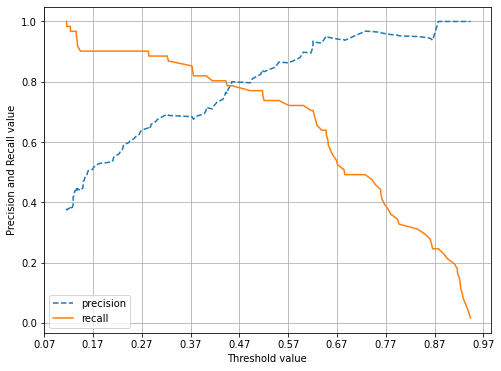

In [83]:
# p.163 정밀도와 재현율 곡선 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축 threshold, Y축 정밀도, 재현율 값으로 Plot수행, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    # Threshold : 임곗값, Precision and Recall value : 정밀도, 재현율 값
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
# 정밀도 점선, 재현율 실선
# 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

- 과제09/14 (3)

ROC Curve와 AUC를 시각화하여 의미를 설명하고 ROC AUC 값을 구하세요

In [84]:
# p.167 ROC 곡선과 AUC
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPH 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

# 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 커짐
# FPR이 조금씩 커질때 TPR은 가파르게 커짐

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


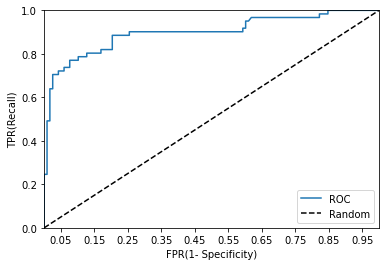

In [85]:
# p.170 FPR 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화하기
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1- Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [86]:
# p.171
# ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용
# ROC 곡선 면적에 기반한 AUC 값 : 분류의 성능 지표로 사용
# AUC값은 ROC곡선 밑의 면적을 구한 것, 1에 가까울수록 좋은 수치. 보통의 분류는 0.5이상의 AUC값을 가진다
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있는지가 관건
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [87]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred) 
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f}, F1: {3:.4f},\
        AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

- 과제09/15 (1)

diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가
- 0 Negative, 1 Positive

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [101]:
# p.172
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

d_data = pd.read_csv('./dataset/diabetes.csv')
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
d_data.Outcome.value_counts()
# 65%가 negative

0    500
1    268
Name: Outcome, dtype: int64

In [103]:
d_data.info() # nan값은 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
d_data.SkinThickness.value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [105]:
d_data.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [106]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = d_data.iloc[:, :-1]
y = d_data.iloc[:, -1]

# stratify=y : 원래 데이터와 비슷하게 뽑아주는 옵션
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.772727, 정밀도: 0.7111, 재현율 : 0.5926, F1: 0.6465,        AUC:0.8083


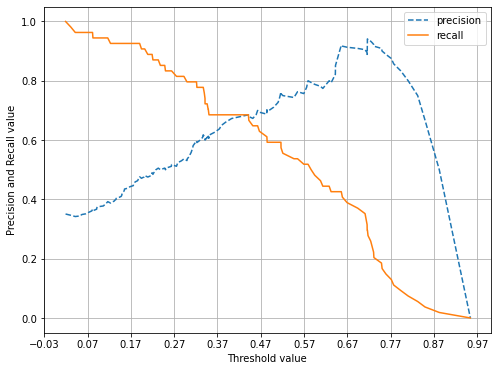

In [107]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)
# 0.42에서 정밀도와 재현율이 균형을 이루지만 0.7이 안되는 수치
# 임계치를 크게하면 양성(P)으로 예측하는게 줄어듬(TP, FP). FN은 증가

In [108]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


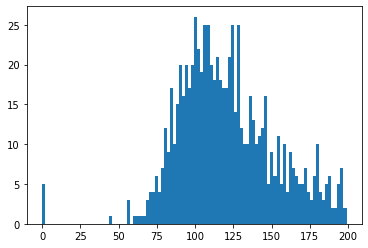

In [109]:
plt.hist(d_data['Glucose'], bins=100)
plt.show()
# 0값으로 5개 존재

In [110]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = d_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = d_data[d_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [111]:
# p.178
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = d_data[zero_features].mean()
d_data[zero_features] = d_data[zero_features].replace(0, mean_zero_features)

In [112]:
X = d_data.iloc[:, :-1]
y = d_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터셋에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

# stratify=y : 원래 데이터와 비슷하게 뽑아주는 옵션
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.798701, 정밀도: 0.7674, 재현율 : 0.6111, F1: 0.6804,        AUC:0.8433


In [115]:
# # threshold : 임곗값 p.179
# thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
# pred_proba = lr_clf.predict_proba(X_test)
# get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [118]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.798701, 정밀도: 0.7447, 재현율 : 0.6481, F1: 0.6931,        AUC:0.8433


- 과제09/16 (2)<br>
- tdf1 데이터셋을 RandomForest 알고리즘을 사용하여 모델링하고 함수를 작성하여 평가하세요.<br>
(분류 평가 방법 전부 적용<br>
- 상기 모델에 대하여 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.
- 상기 모델에 대하여 교차검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)
 - 하이퍼파라미터 : params = {'n_estimators':[50,100,200], 'max_depth':[2, 4, 6, 8, 10], 'min_samples_leaf':[2,8,14,20], 'min_samples_split':[2,8.14,20]}



In [ ]:
# params = {'n_estimators':[50,100,200],
#          'max_depth':[2, 4, 6, 8, 10],
#          'min_samples_leaf':[2,8,14,20],
#          'min_samples_split':[2,8.14,20]}

In [3]:
import pandas as pd

tdf = pd.read_pickle('./dataset/tdf1.pkl')
tdf.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2
